In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 


In [3]:
Financials = pd.read_csv("/Users/sa20/Desktop/Fraud-Detection/Data/raws.csv")
Financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
Financials.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
Financials.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:

Financials.rename(columns={'oldbalanceDest': 'OldDest', 
                           'newbalanceDest': 'NewDest', 
                           'oldbalanceOrg' : 'OldOrig',
                           'newbalanceOrig': 'NewOrig',
                           'amount' : 'Amount',
                           'isFraud' : 'Fraud'}, inplace=True)


In [7]:
Financials.isna().count() 

step              6362620
type              6362620
Amount            6362620
nameOrig          6362620
OldOrig           6362620
NewOrig           6362620
nameDest          6362620
OldDest           6362620
NewDest           6362620
Fraud             6362620
isFlaggedFraud    6362620
dtype: int64

In [8]:
Financials.shape

(6362620, 11)

Very Large data set (add moore detailed summary later)

# Univariate Analysis

In [9]:
random_sample = Financials.sample(n=100000, random_state=42)

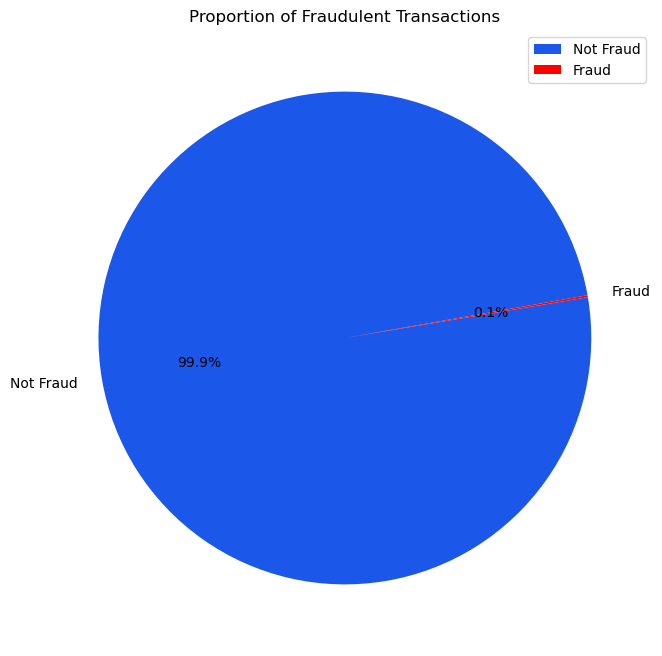

In [10]:
fraud_counts = Financials['Fraud'].value_counts()
fraud_counts = Financials['Fraud'].map({1: 'Fraud', 0: 'Not Fraud'}).value_counts()
explode = [0.1 if label == 1 else 0 for label in fraud_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=10, colors=['#1b57e9', 'red'])
plt.title('Proportion of Fraudulent Transactions')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

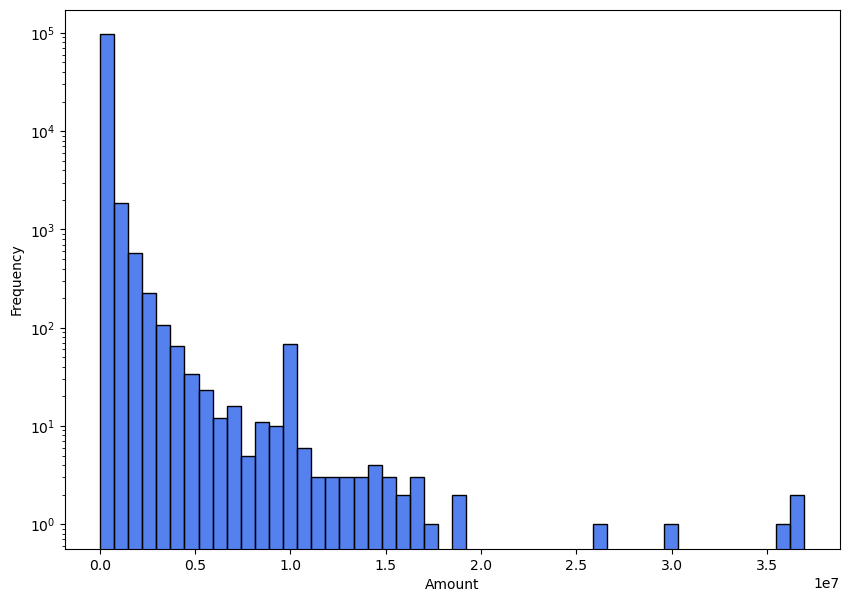

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(random_sample['Amount'], bins=50, kde=False, color='#1b57e9')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show

<Axes: xlabel='type'>

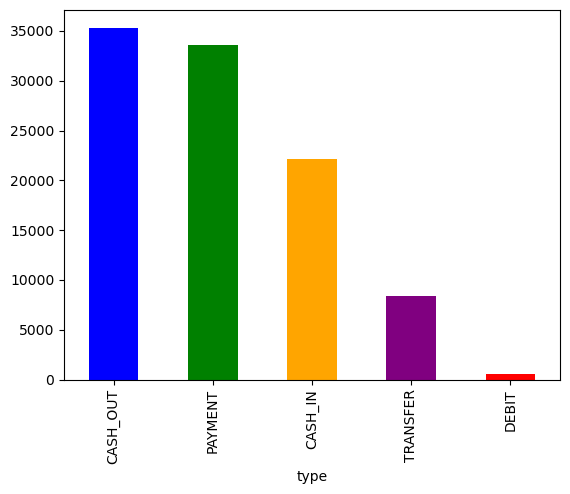

In [12]:
transaction_type = random_sample['type'].value_counts()
colors = ['blue', 'green', 'orange', 'purple', 'red']
transaction_type.plot.bar(color=colors)

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

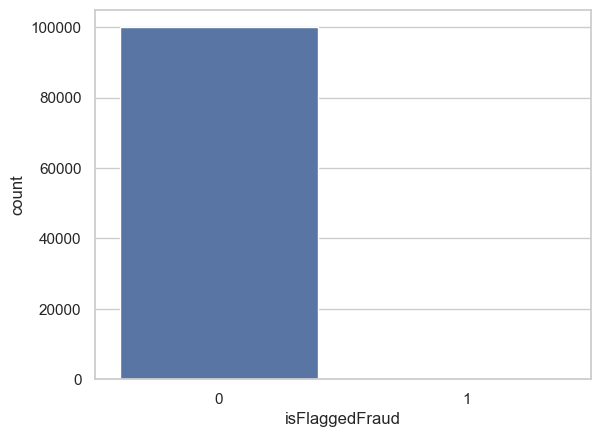

In [19]:
sns.countplot(x='isFlaggedFraud', data=random_sample)

During my initial analysis, I noticed that I never investigated 'isFlaggedFraud'. So after revisiting this section, it makes me wonder if this column is necessary as this visualization makes 'isFlaggedFraud' seem very unbalanced.

# Bivariate Analysis

<Axes: xlabel='Amount', ylabel='NewDest'>

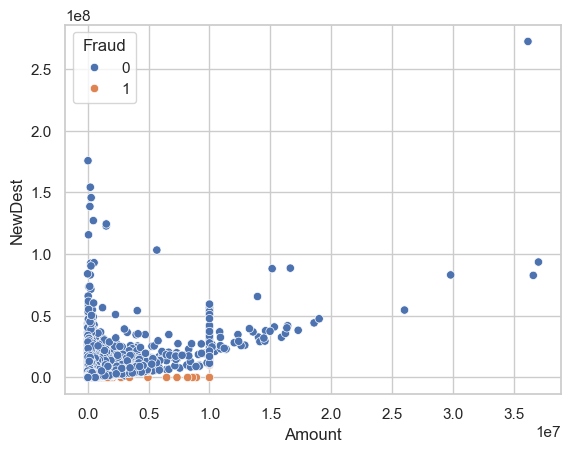

In [17]:
sns.scatterplot(data=random_sample, x='Amount', y='NewDest', hue='Fraud')

In [43]:
print(random_sample[['Amount','NewOrig','Fraud']].isnull().sum())

Amount     0
NewOrig    0
Fraud      0
dtype: int64


<Axes: xlabel='Amount', ylabel='NewOrig'>

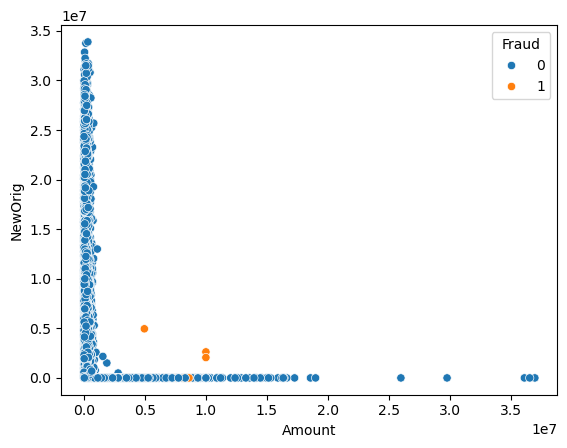

In [13]:
sns.scatterplot(data=random_sample, x="Amount", y="NewOrig", hue ="Fraud")

<Axes: xlabel='Amount', ylabel='OldDest'>

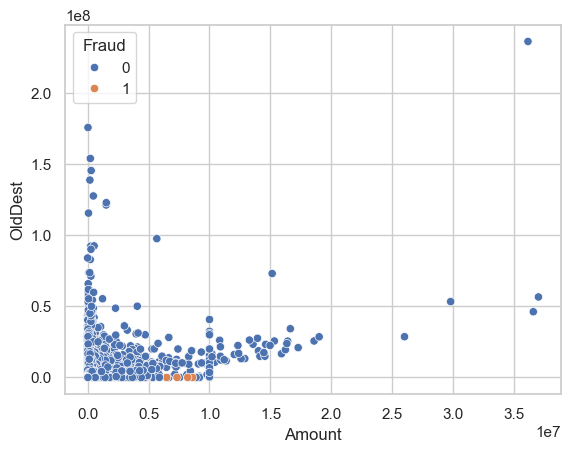

In [20]:
sns.scatterplot(data=random_sample, x='Amount', y='OldDest', hue='Fraud')

<Axes: xlabel='type', ylabel='count'>

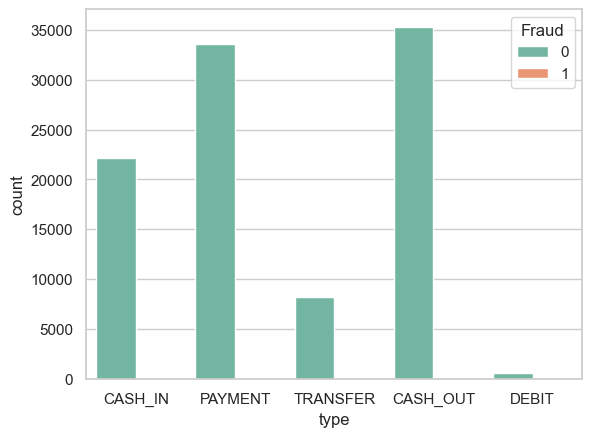

In [22]:
sns.countplot(x='type', data=random_sample, hue='Fraud', palette='Set2')

In [48]:
print(float_cols)

Index(['Amount', 'OldOrig', 'NewOrig', 'OldDest', 'NewDest'], dtype='object')


In [14]:
random_sample= Financials.sample(100000, random_state=42)
float_cols = random_sample.select_dtypes(include=["float64"]).columns 
random_sample.loc[:,float_cols] = random_sample.loc[:, float_cols].fillna(random_sample[float_cols].median())

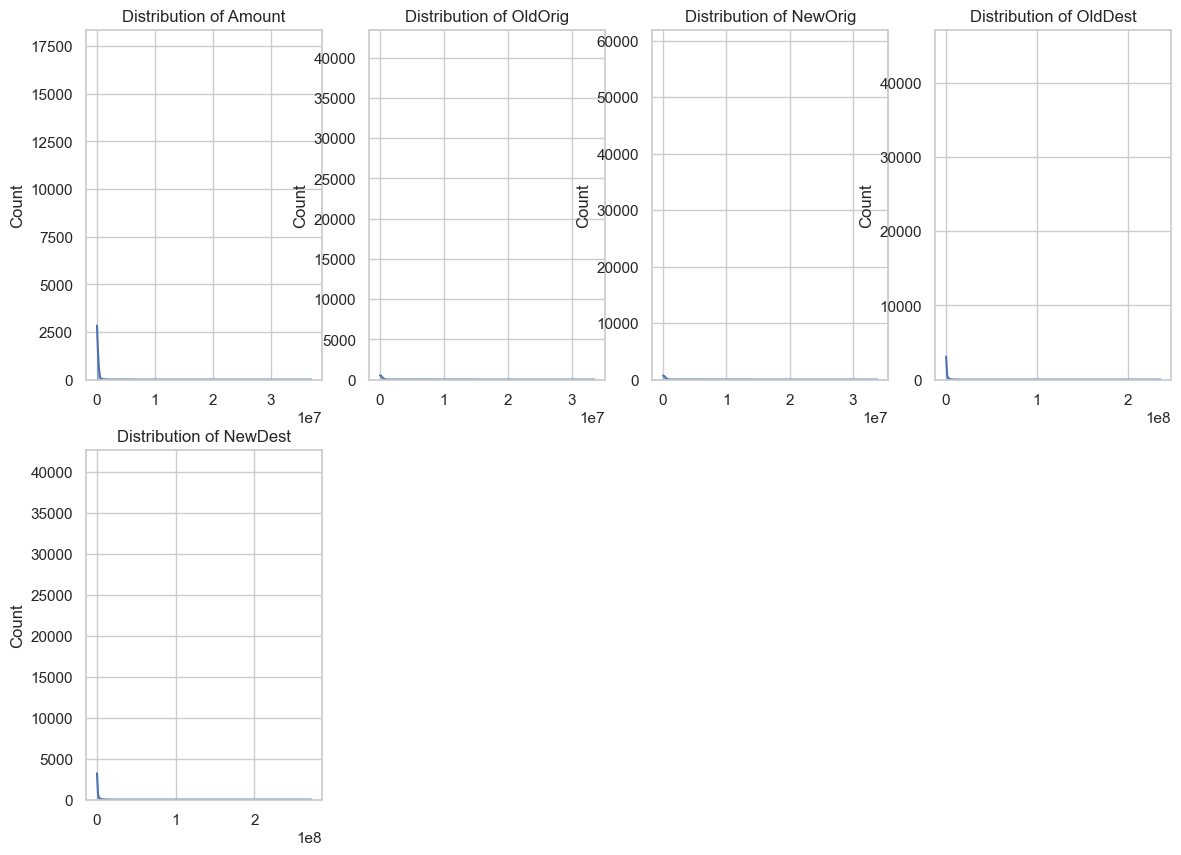

In [15]:
sns.set(style="whitegrid")
float_cols = random_sample.select_dtypes(include=["float64"]).columns 
num_cols = 4
num_rows = -(-len(float_cols) // num_cols)

plt.figure(figsize=(14,10))
for i, col in enumerate(float_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(random_sample[col], kde=True)
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel('')
